<a href="https://colab.research.google.com/github/Intelligentlyfavoured/Artificial-Intelligence/blob/main/K_means_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Testing with k = 2


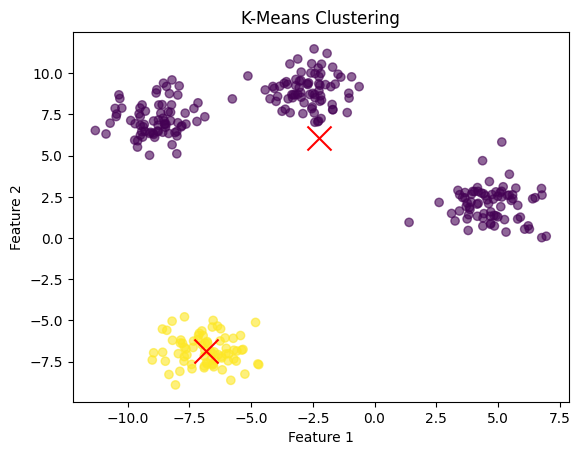

Inertia for k = 2: 9416.214004352274

Testing with k = 3


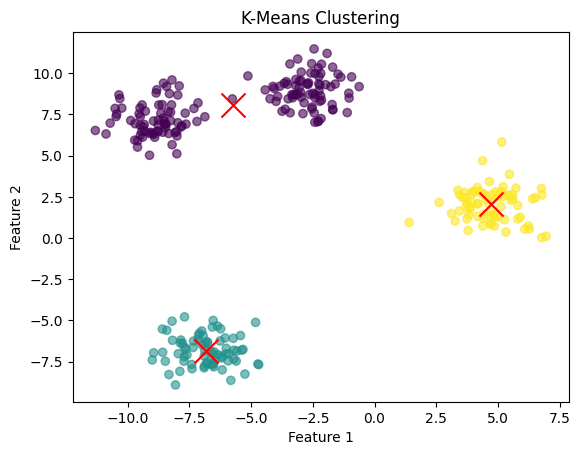

Inertia for k = 3: 2110.412521895329

Testing with k = 4


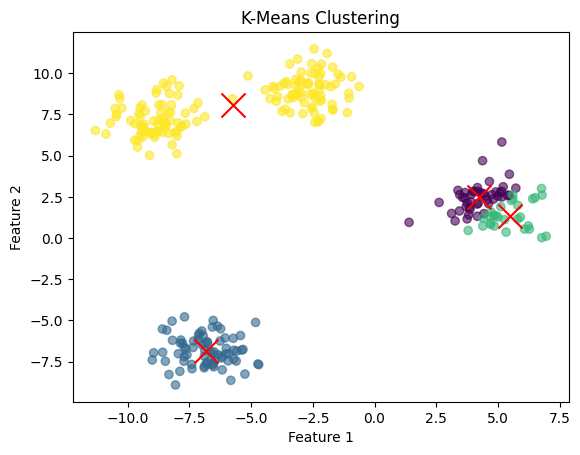

Inertia for k = 4: 2058.5374641530957

Testing with k = 5


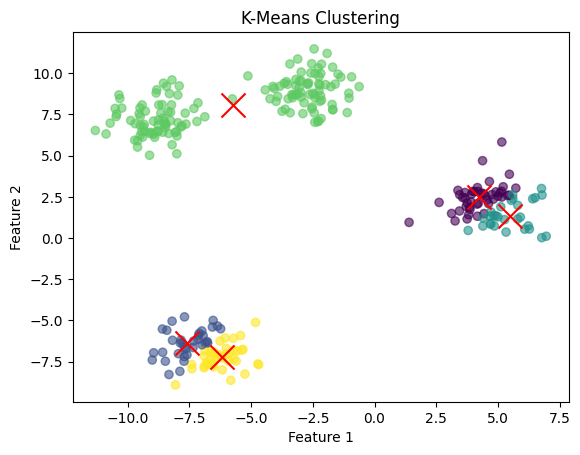

Inertia for k = 5: 2007.6005606618332


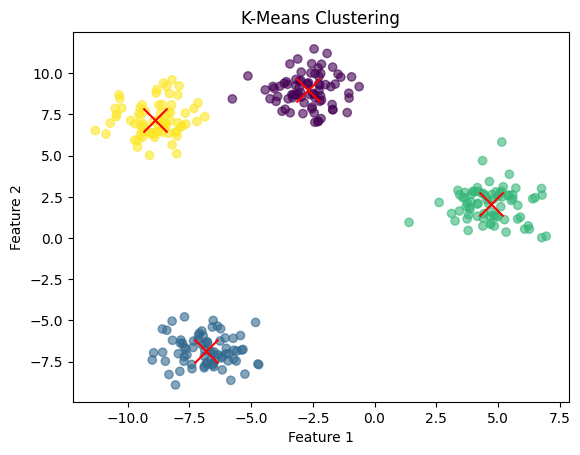

Scikit-learn Inertia for k = 4: 564.9141808210254

Centroids with k-means++ initialization: [[ 4.43175659  1.48016875]
 [-9.49016386  7.37092159]
 [-2.96983639 10.07140835]
 [-6.19767422 -7.19037635]]


In [1]:
# Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, List

# Part 1: Core Implementation

# 1. Distance Function
def euclidean_distance(point1: np.ndarray, point2: np.ndarray) -> float:
    """
    Calculate the Euclidean distance between two points.
    """
    return np.sqrt(np.sum((point1 - point2) ** 2))

# 2. Centroid Initialization
def initialize_centroids(X: np.ndarray, k: int) -> np.ndarray:
    """
    Initialize k centroids randomly from the data points.
    """
    np.random.seed(42)
    random_indices = np.random.choice(X.shape[0], k, replace=False)
    return X[random_indices]

# 3. Main Algorithm
class KMeans:
    def __init__(self, k: int, max_iters: int = 100, tol: float = 1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = None

    def fit(self, X: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
        """
        Fit K-Means clustering to the data.
        """
        # Initialize centroids
        self.centroids = initialize_centroids(X, self.k)
        for i in range(self.max_iters):
            # Assign clusters
            labels = self._assign_clusters(X)
            # Calculate new centroids
            new_centroids = self._calculate_centroids(X, labels)
            # Check for convergence
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break
            self.centroids = new_centroids
        return labels, self.centroids

    def _assign_clusters(self, X: np.ndarray) -> np.ndarray:
        """
        Assign each point to the nearest centroid.
        """
        distances = np.array([[euclidean_distance(x, centroid) for centroid in self.centroids] for x in X])
        return np.argmin(distances, axis=1)

    def _calculate_centroids(self, X: np.ndarray, labels: np.ndarray) -> np.ndarray:
        """
        Recalculate centroids as the mean of assigned points.
        """
        return np.array([X[labels == j].mean(axis=0) for j in range(self.k)])

# Part 2: Visualization and Analysis

# 1. Plotting Function
def plot_clusters(X: np.ndarray, labels: np.ndarray, centroids: np.ndarray):
    """
    Visualize the clusters and centroids.
    """
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', alpha=0.6)
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='x')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("K-Means Clustering")
    plt.show()

# 2. Performance Metrics
def calculate_inertia(X: np.ndarray, labels: np.ndarray, centroids: np.ndarray) -> float:
    """
    Calculate the within-cluster sum of squares (inertia).
    """
    inertia = 0.0
    for i, centroid in enumerate(centroids):
        cluster_points = X[labels == i]
        inertia += np.sum((cluster_points - centroid) ** 2)
    return inertia

# Part 3: Testing and Validation

# Generate synthetic dataset
from sklearn.datasets import make_blobs
X, true_labels = make_blobs(n_samples=300, centers=4, random_state=42)

# Test with different k values and visualizations
for k in [2, 3, 4, 5]:
    print(f"\nTesting with k = {k}")
    kmeans = KMeans(k=k)
    labels, centroids = kmeans.fit(X)
    plot_clusters(X, labels, centroids)
    inertia = calculate_inertia(X, labels, centroids)
    print(f"Inertia for k = {k}: {inertia}")

# Comparison with scikit-learn's implementation
from sklearn.cluster import KMeans as SklearnKMeans
sklearn_kmeans = SklearnKMeans(n_clusters=4, random_state=42)
sklearn_labels = sklearn_kmeans.fit_predict(X)
sklearn_inertia = sklearn_kmeans.inertia_

# Visualization
plot_clusters(X, sklearn_labels, sklearn_kmeans.cluster_centers_)
print(f"Scikit-learn Inertia for k = 4: {sklearn_inertia}")

# Optional: Implement k-means++ for extra credit
def initialize_centroids_kmeans_plus_plus(X: np.ndarray, k: int) -> np.ndarray:
    """
    Initialize k centroids using k-means++ algorithm.
    """
    np.random.seed(42)
    centroids = [X[np.random.choice(range(X.shape[0]))]]
    for _ in range(1, k):
        distances = np.array([min([euclidean_distance(x, c) for c in centroids]) for x in X])
        probabilities = distances / distances.sum()
        cumulative_probabilities = np.cumsum(probabilities)
        r = np.random.rand()
        for j, p in enumerate(cumulative_probabilities):
            if r < p:
                centroids.append(X[j])
                break
    return np.array(centroids)

# Extra Credit Implementation
centroids_kmeans_plus = initialize_centroids_kmeans_plus_plus(X, 4)
print("\nCentroids with k-means++ initialization:", centroids_kmeans_plus)
